In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.formula.api import ols as smf

In [18]:
df = pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\Spark\lin_data.csv")
print(df.shape)
df.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


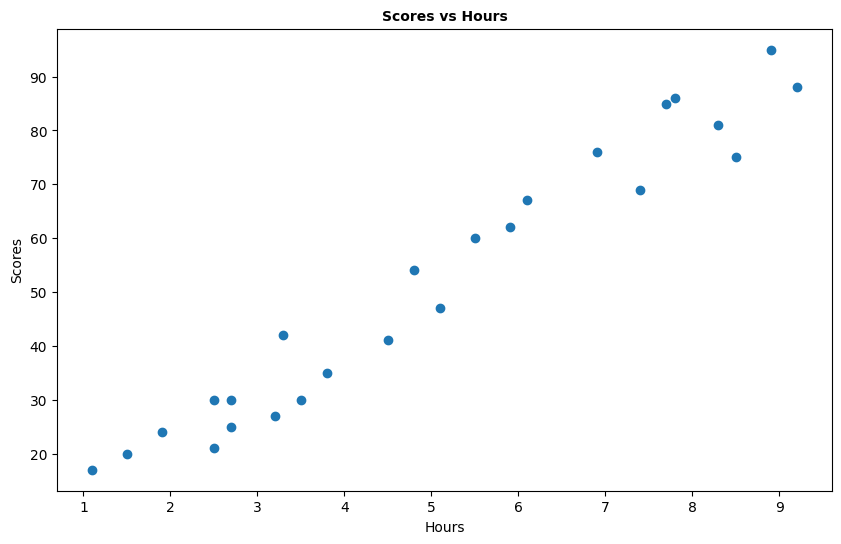

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores vs Hours',fontsize=10,weight='bold')
# plt.grid('white');
plt.show()

In [20]:
df['Hours'].corr(df['Scores'])

0.9761906560220887

In [21]:
input = ['Hours']
X = df[input]
target = 'Scores'
y = df[target]
print('Input:',X.shape)
print('target:',y.shape)

Input: (25, 1)
target: (25,)


In [22]:
inpu = df['Hours'].values
X = inpu.reshape(-1,1)
print('Input:',X.shape)
print('target:',y.shape)

Input: (25, 1)
target: (25,)


In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (17, 1)
X_test: (8, 1)
Y_train: (17,)
y_test: (8,)


In [24]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [25]:
print("Intercept:",model1.intercept_)
print("coefficient:",model1.coef_)

Intercept: 2.794196676599803
coefficient: [9.71054094]


In [26]:
# Scores = model1.coef_ + model1.intercept_ * Hours

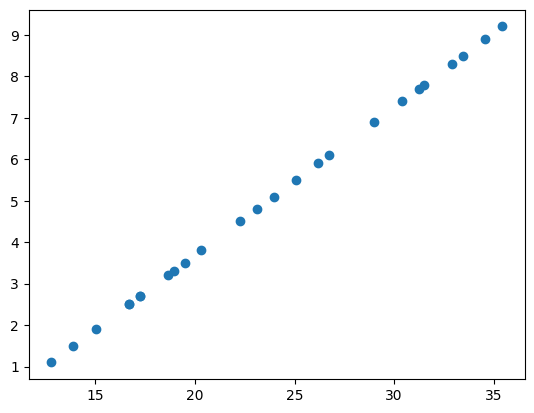

In [27]:
Scores = model1.coef_ + model1.intercept_ * df['Hours']
plt.scatter(Scores,df['Hours'])
plt.show()

In [28]:
Scores = [[20]]
model1.predict(Scores)

array([197.0050154])

In [29]:
print("MAE:",np.round(mean_absolute_error(y_test,model1.predict(X_test)),3))
print("MSE:",np.round(mean_squared_error(y_test,model1.predict(X_test)),3))

MAE: 4.5
MSE: 23.619


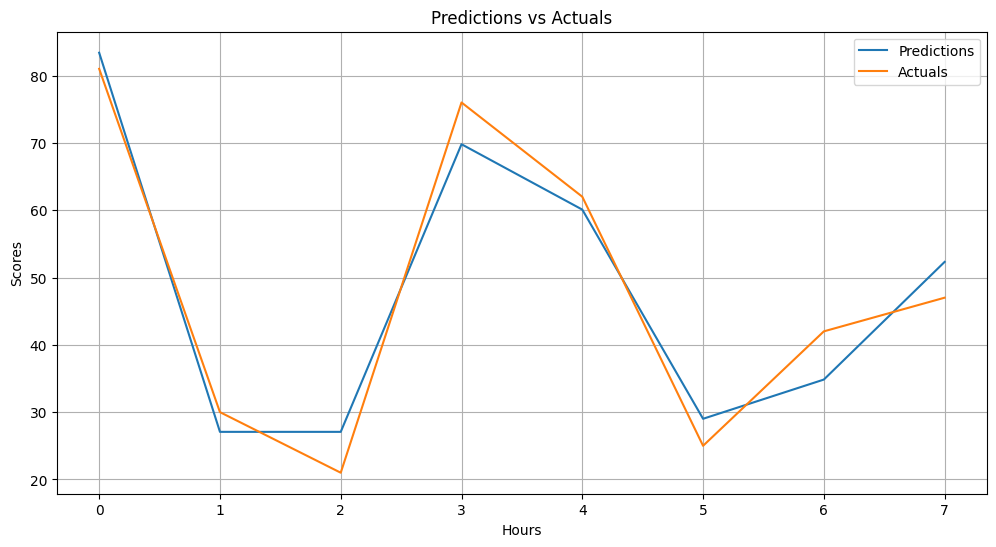

In [30]:
Predictions = model1.predict(X_test)
Actuals = y_test.values
compare = pd.concat([
           pd.DataFrame(Predictions,columns=['Predictions']),
           pd.DataFrame(Actuals,columns=['Actuals'])
            ],
                        axis=1)
compare.plot(figsize=(12,6),title='Predictions vs Actuals',xlabel='Hours',ylabel='Scores',grid='white')
plt.show()

In [36]:
model2= smf(formula=('Scores ~ Hours'),data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           9.13e-17
Time:                        23:40:27   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""